In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression

In [ ]:
def re(y_val, y_pred):
  rae = []
  for i in range(len(y_val)):
    rae.append(abs(y_val[i]-y_pred[i])/y_val[i])
  t = sum(rae)
  return (t/len(y_val))

In [ ]:
data_train = pd.read_excel("training_set.xlsx")

In [ ]:
data_train.head()

,Number,"Cutting depth, (mm)","Feed rate, f (mm/min)","Spindle speed, n (r/min)","Cutting length, L (mm)","Position, h (mm)","Tool wear, VB (mm)"
0,1,1.2,120,1200,432,1.1511,0.0501
1,2,1.5,150,1200,504,1.1511,0.0525
2,3,1.5,100,1000,432,1.1511,0.0473
3,4,1.8,100,1200,576,1.1511,0.0105
4,5,1.8,150,1400,432,1.0000,0.0427


In [ ]:
data_train = data_train.drop("Number", axis = 1)
data_train.shape

(24, 6)

In [ ]:
data_train.describe()

,"Cutting depth, (mm)","Feed rate, f (mm/min)","Spindle speed, n (r/min)","Cutting length, L (mm)","Position, h (mm)","Tool wear, VB (mm)"
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,1.354167,142.083333,1366.666667,453.000000,0.978246,0.032100
std,0.253633,21.260121,192.617365,68.730096,0.193418,0.014417
min,1.000000,100.000000,1000.000000,360.000000,0.758700,0.010500
25%,1.200000,130.000000,1200.000000,432.000000,0.763400,0.020300
50%,1.350000,150.000000,1400.000000,432.000000,1.075550,0.028450
75%,1.500000,150.000000,1600.000000,504.000000,1.162100,0.044825
max,1.800000,180.000000,1600.000000,576.000000,1.162100,0.057700


In [ ]:
data_train.corr()["Tool wear, VB (mm)"][:-1]

Cutting depth,  (mm)        0.314740
Feed rate, f (mm/min)      -0.187246
Spindle speed, n (r/min)   -0.484428
Cutting length, L (mm)      0.308979
Position, h (mm)           -0.343072
Name: Tool wear, VB (mm), dtype: float64

Text(0, 0.5, 'Tool Wear (mm)')

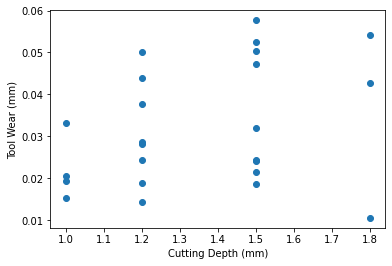

In [ ]:
plt.scatter(data_train.iloc[:,0],data_train['Tool wear, VB (mm)'])
plt.xlabel('Cutting Depth (mm)')
plt.ylabel("Tool Wear (mm)")

In [ ]:
data_validate = pd.read_excel("validation_set.xlsx")
X_val = data_validate.drop(["Number","Tool wear, VB (mm)"], axis = 1)
y_val = data_validate["Tool wear, VB (mm)"]
X_train = data_train.drop("Tool wear, VB (mm)", axis = 1)
y_train = data_train['Tool wear, VB (mm)']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

# **Original Dataset**

0.27049356114762024


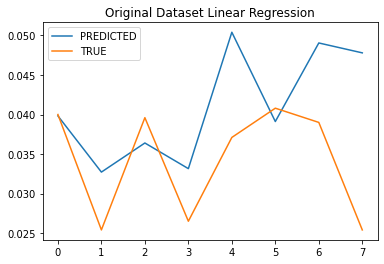

In [ ]:
regsk = LinearRegression().fit(X_train, y_train)
y_pred_ol = regsk.predict(X_val)
print(re(y_val, y_pred_ol))
plt.plot(range(8),y_pred_ol,label ='PREDICTED' )
plt.plot(range(8),y_val,label = 'TRUE')
plt.title('Original Dataset Linear Regression')
plt.legend()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor 
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, y_train)

KNeighborsRegressor()

0.17742924127967596


Text(0.5, 1.0, 'Original Dataset KNN Regression')

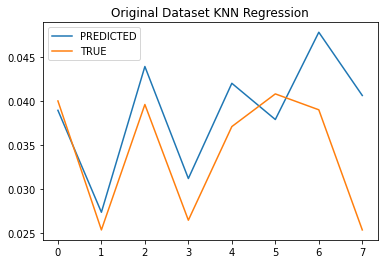

In [ ]:
y_pred_ok = neigh.predict(X_val)
print(re(y_val, y_pred_ok))
plt.plot(range(8),y_pred_ok,label ='PREDICTED' )
plt.plot(range(8),y_val,label = 'TRUE')
plt.legend()
plt.title('Original Dataset KNN Regression')

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential([Dense(units = 2 , activation = 'sigmoid'),Dense(units = 1, activation = 'linear')])

In [ ]:
from tensorflow.keras.losses import MeanAbsoluteError

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3), loss = MeanAbsoluteError() )
model.fit(X_train, y_train, epochs = 700)

1/1 [==============================] - 0s 47ms/step
[0.46383262]


Text(0.5, 1.0, 'Original Dataset Neural Network')

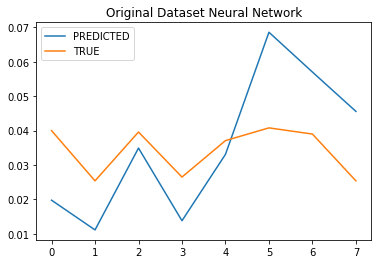

In [ ]:
y_pred_on = model.predict(X_val)
print(re(y_val, y_pred_on))
plt.plot(range(8),y_pred_on,label ='PREDICTED' )
plt.plot(range(8),y_val,label = 'TRUE')
plt.legend()
plt.title('Original Dataset Neural Network')

In [ ]:
data_train = pd.read_excel("training_set.xlsx")

In [ ]:
#feature engineering
newt_dataset = data_train.copy()
newt_dataset['F_mm_per_rev'] = newt_dataset['Feed rate, f (mm/min)']/newt_dataset['Spindle speed, n (r/min)']
newt_dataset['time'] = newt_dataset['Cutting length, L (mm)']/newt_dataset['Feed rate, f (mm/min)']

newv_dataset = data_validate.copy()
newv_dataset['F_mm_per_rev'] = newv_dataset['Feed rate, f (mm/min)']/newv_dataset['Spindle speed, n (r/min)']
newv_dataset['time'] = newv_dataset['Cutting length, L (mm)']/newv_dataset['Feed rate, f (mm/min)']

newt_dataset.head()

,Number,"Cutting depth, (mm)","Feed rate, f (mm/min)","Spindle speed, n (r/min)","Cutting length, L (mm)","Position, h (mm)","Tool wear, VB (mm)",F_mm_per_rev,time
0,1,1.2,120,1200,432,1.1511,0.0501,0.100000,3.60
1,2,1.5,150,1200,504,1.1511,0.0525,0.125000,3.36
2,3,1.5,100,1000,432,1.1511,0.0473,0.100000,4.32
3,4,1.8,100,1200,576,1.1511,0.0105,0.083333,5.76
4,5,1.8,150,1400,432,1.0000,0.0427,0.107143,2.88


In [ ]:
X_val = newv_dataset.drop(["Number","Tool wear, VB (mm)"], axis = 1)
y_val = newv_dataset["Tool wear, VB (mm)"]

X_train = newt_dataset.drop(["Number","Tool wear, VB (mm)"], axis = 1)
y_train = newt_dataset['Tool wear, VB (mm)']

# **Feature Engineered Dataset**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

NameError: ignored

In [ ]:
regsk = LinearRegression().fit(X_train, y_train)
y_pred_el = regsk.predict(X_val)
print(re(y_val, y_pred_el))
plt.plot(range(8),y_pred_el,label ='PREDICTED' )
plt.plot(range(8),y_val,label = 'TRUE')
plt.legend()
plt.title('Engineered Dataset Linear Regression')


In [ ]:
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, y_train)
y_pred_ek = neigh.predict(X_val)
print(re(y_val, y_pred_ek))
plt.plot(range(8),y_pred_ek,label ='PREDICTED' )
plt.plot(range(8),y_val,label = 'TRUE')
plt.legend()
plt.title('Engineered Dataset KNN Regression')

In [ ]:
model = Sequential([Dense(units = 2 , activation = 'sigmoid'),Dense(units = 1, activation = 'linear')])
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3), loss = MeanAbsoluteError() )
model.fit(X_train, y_train, epochs = 700)

In [ ]:
y_pred_en = model.predict(X_val)
print(re(y_val, y_pred_en))
plt.plot(range(8),y_pred_en,label ='PREDICTED' )
plt.plot(range(8),y_val,label = 'TRUE')
plt.legend()
plt.title('Engineered Dataset Neural Network')

# **Feature Selected Dataset**

In [ ]:
newt_dataset.corr()["Tool wear, VB (mm)"][1:]

Cutting depth,  (mm)        0.314740
Feed rate, f (mm/min)      -0.187246
Spindle speed, n (r/min)   -0.484428
Cutting length, L (mm)      0.308979
Position, h (mm)           -0.343072
Tool wear, VB (mm)          1.000000
F_mm_per_rev                0.264768
time                        0.212545
Name: Tool wear, VB (mm), dtype: float64

In [ ]:
X_trains = X_train[:,[2]]
X_vals= X_val[:,[2]]

0.19537338191489761


Text(0.5, 1.0, 'Selected Dataset Linear Regression')

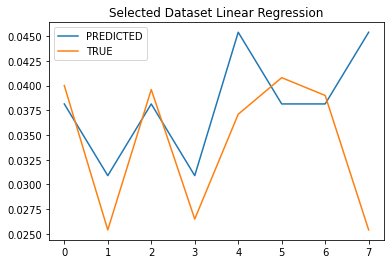

In [ ]:
regsk = LinearRegression().fit(X_trains, y_train)
y_pred_sl = regsk.predict(X_vals)
print(re(y_val, y_pred_sl))
plt.plot(range(8),y_pred_sl,label ='PREDICTED' )
plt.plot(range(8),y_val,label = 'TRUE')
plt.legend()
plt.title('Selected Dataset Linear Regression')

0.2542394271832249


Text(0.5, 1.0, 'Selected Dataset KNN Regression')

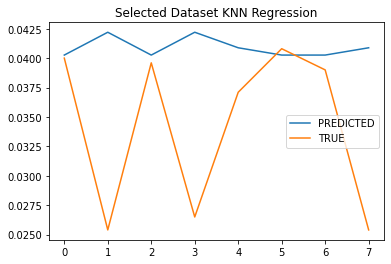

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_trains, y_train)
y_pred_sk = neigh.predict(X_vals)
print(re(y_val, y_pred_sk))
plt.plot(range(8),y_pred_sk,label ='PREDICTED' )
plt.plot(range(8),y_val,label = 'TRUE')
plt.legend()
plt.title('Selected Dataset KNN Regression')

In [ ]:
model = Sequential([Dense(units = 2 , activation = 'sigmoid'),Dense(units = 1, activation = 'linear')])
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3), loss = MeanAbsoluteError() )
model.fit(X_trains, y_train, epochs = 700)

1/1 [==============================] - 0s 25ms/step
MRE :[0.1822207]


Text(0.5, 1.0, 'Selected Dataset Neural Network')

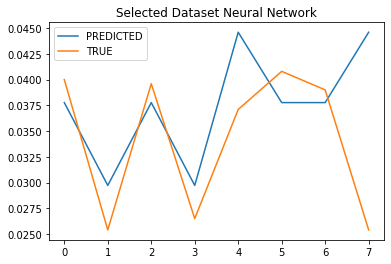

In [ ]:
y_pred_sn = model.predict(X_vals)
print(f'MRE :{re(y_val, y_pred_sn)}')
plt.plot(range(8),y_pred_sn,label ='PREDICTED' )
plt.plot(range(8),y_val,label = 'TRUE')
plt.legend()
plt.title('Selected Dataset Neural Network')

# **Ensemble model**

In [ ]:
y_pred = (  y_pred_ok.reshape(8,1) +   y_pred_ek.reshape(8,1)  + y_pred_sl.reshape(8,1)  + y_pred_sn.reshape(8,1))/4

MRE: [0.16793682]


Text(0.5, 1.0, 'Ensemble Model')

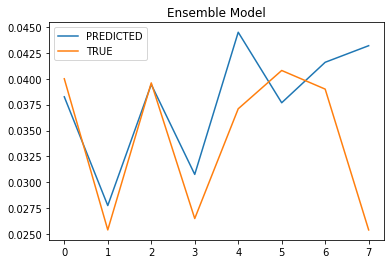

In [ ]:
print(f'MRE: {re(y_val, y_pred)}')
plt.plot(range(8),y_pred,label ='PREDICTED' )
plt.plot(range(8),y_val,label = 'TRUE')
plt.legend()
plt.title('Ensemble Model')

In [ ]:
t = { 
      'Original Dataset ' : [0.270,0.177,0.463],
      'Engineered Dataset' : [0.254,0.180,0.234],
      'Selected Dataset' : [0.195,0.254,0.182]
}

In [ ]:
df = pd.DataFrame(t, index = ['Linear Regression', 'KNN Regression', 'Neural Network'])
df

,Original Dataset,Engineered Dataset,Selected Dataset
Linear Regression,0.270,0.254,0.195
KNN Regression,0.177,0.180,0.254
Neural Network,0.463,0.234,0.182
